## Data Cleaning and Exploring

The purpose of this notebook is to explore the data we have, clean up any mess in the data, and test the data in a model to see how it does. 

This will be our baseline model, our starting point we will try to improve. Being that we are dealign with a binary classification problem, we are choosing to use ROC_AUC as a metric to measure the confidence level of our models performance.

Once we find a baseline model that has a score in the .90s, this model will become the new baseline/starting point to improve from. 

In [60]:
# Importing the needed libraries for data manipulation and vizulization 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing the models/metrics we would like to try for our basline 
from sklearn.preprocessing import RobustScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import roc_auc_score


In [2]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv') # reading in the csv file

In [3]:
df.head() # viewing the data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.shape # seeing how many columns and rows we have in the data

(3333, 21)

In [5]:
df.info() # checking the data types of the columns and rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [6]:
df.isna().sum() # checking for missing values 

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [7]:
df.describe() # checking the spread of the data; max and min are very spaced out so scaling is required!

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [8]:
df['churn'].value_counts() # checking the target of the data to see if it is well balanced 

False    2850
True      483
Name: churn, dtype: int64

## Quick Observation: 
***Churning is the target.*** 

***When viewing the data it is very imbalanced.*** 


***Lets run a modeless basline to see how the data does without any changes.***

## Model Less Baseline: Without Change

In [9]:
# grab X and y

X, y = df.drop(columns='churn'), df['churn']

In [10]:
1 - y.mean() 
# checking the accuracy score of the data without any data transformation
# this is my model- less baseline

0.8550855085508551

**The data left alone does ok, but it does need to be scaled!**

**I would also like to know which columns are useful and which ones are not!**

In [11]:
df.nunique() 
# checking how many unique values there are; 
# area code vs phone number looks like something to look into
# so does voice mail and international plan

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day minutes         1667
total day calls            119
total day charge          1667
total eve minutes         1611
total eve calls            123
total eve charge          1440
total night minutes       1591
total night calls          120
total night charge         933
total intl minutes         162
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

## The Strings in the DF
**The columns that have string will be an issue when it comes to running a model. So lets take a deeper look into those columns.** 

In [12]:
df['phone number'].head() # has a - in the number! but I may just use area code!

0    382-4657
1    371-7191
2    358-1921
3    375-9999
4    330-6626
Name: phone number, dtype: object

In [13]:
df['voice mail plan'].value_counts() # yes and no can be change to int 0 and 1

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [14]:
df['international plan'].value_counts()   # yes and no can be change to int 0 and 1

no     3010
yes     323
Name: international plan, dtype: int64

In [15]:
df['state'].value_counts() # WV looks like it may be pulling at the mean a bit (32 numbers a head of MN)

WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
VT     73
ID     73
MI     73
TX     72
UT     72
IN     71
KS     70
MD     70
NJ     68
MT     68
NC     68
NV     66
CO     66
WA     66
MS     65
MA     65
RI     65
AZ     64
FL     63
MO     63
ND     62
NM     62
ME     62
OK     61
NE     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
DC     54
GA     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [16]:
df['area code'].value_counts() 
# only three values so it maybe be easier to deal with vs the phone number that has a lot of unique values

415    1655
510     840
408     838
Name: area code, dtype: int64

# The Data 
We will need to determine which columns are important or not important. Another thing is if we want to use the phone numbers in or analysis we need to take out the - or we could simply just use the area code column vs the phone number column. But to determine which one the model feels is more important we need to take out the -.

# Balancing the Data
The data is very imbalanced, but we can fix this by trying three things
1. We can over sample the minority of the target columns which is people who have churned
2. We can then follow up by under sampling the people who have not churned
3. We as well could just use the class_weight parameter in a model of our choice (that supports this parameter of course).

# The Business Problem Approach:
We are trying to figure out who will churn or not aka leave a telecommunication company or not. We want to help companies make packages for the loyal customers as well as create packages that will create more loyal customers based off of the things/features they use the company for. This will bring in more profit for the company being that they are attracting more clients withe their deals and also we can take it a step further and create packages per state!! 

**Before we start:** After speaking with the instructors we need to look first at out predicting model. We need to see if we can predict who will churn or not.

This can be advertised to companies who are losing a lot of customers, we can sell them a product that will predict whether a potential or current customer will be a good ROI or not?


# Tackling the Data

In [17]:
df['p_number'] = df['area code'].astype(str) + df['phone number'] 
# creating new column with area code and phone number combined

In [18]:
df['p_number'].head() # checking my work

0    415382-4657
1    415371-7191
2    415358-1921
3    408375-9999
4    415330-6626
Name: p_number, dtype: object

In [19]:
df['p_number'] = df['p_number'].str.replace('-', '') # taking out the - in the p_number column 

In [20]:
df['p_number'] = df['p_number'].astype(int) # changing the data type to int

In [21]:
df['international plan'] = df['international plan'].str.replace('no', '0') # changing no to 0

In [22]:
df['international plan'] = df['international plan'].str.replace('yes', '1') # changing yes to 1

In [23]:
df['international plan'].value_counts() # checking my work

0    3010
1     323
Name: international plan, dtype: int64

In [24]:
df['voice mail plan'] = df['voice mail plan'].str.replace('no', '0') # changing no to 0
df['voice mail plan'] = df['voice mail plan'].str.replace('yes', '1') # changing yes to 1

In [25]:
df['voice mail plan'].value_counts() # checking my work

0    2411
1     922
Name: voice mail plan, dtype: int64

# Check-in: 

**We want to use grid search to find the best parameters that work well with this data set. But first we need to encode state column and also figure out if we need to turn churn into 1 and 0 vs true or false.**

In [26]:
df['target'] = df['churn'].astype(int) # creating a target column that has 0 and 1 vs true and false

In [27]:
df['target'].value_counts() # checking my work 

0    2850
1     483
Name: target, dtype: int64

In [28]:
df.info() # checking the data types of the columns I just changed 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [29]:
df['international plan'] = df['international plan'].astype(int)

df['voice mail plan'] = df['voice mail plan'].astype(int)

# fixing the columns that sis not change from str to int

In [30]:
df.info() # checking my work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 23 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
c

In [31]:
X= df.drop(columns= ['phone number', 'area code', 'target', 'state', 'churn']) # recreating the X 
# with dropped str columns that were replaced with new int columns

In [32]:
y = df.target # recreating the y

In [33]:
 X.info() 
# checking my work

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
account length            3333 non-null int64
international plan        3333 non-null int64
voice mail plan           3333 non-null int64
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
p_number                  3333 non-null int64
dtypes: float64(8), int64(10)
memory usage: 468.8

## Baseline : Random Forest Classifier w/ ROC_AUC Metric
This model was our choice because it takes care of multicollinearity as well as our data being imbalanced. It does run the risk of over fitting the data, but it is worth the try.

In [34]:
scale = RobustScaler() # assigning data scaler to variable 

In [35]:
rfc = RandomForestClassifier() # assigning model to variable 

In [36]:
pipe = make_pipeline(scale, rfc) # creating a pipeline for the model to follow 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25,  random_state= 8 ) 
# creating the test and training data split for model

In [38]:
pipe.fit(X_train, y_train) # fitting the pipeline on the training data 

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                          

In [39]:
# predicting on the test data and train data 
test_pred = pipe.predict(X_test)
train_pred = pipe.predict(X_train)

In [40]:
# assigning the scorign of the model to a variable 
train_score = roc_auc_score(y_train, train_pred)
test_score = roc_auc_score(y_test, test_pred)

In [41]:
train_score # score on the train data 

0.9986033519553073

In [42]:
test_score # score on the tested data 

0.8536530324400564

# Observation: 
The test data score above is showing that the model is .83 confident when making predictions. So the next step would be to find parameters that will help the model perform better. We can do this by using grid search. 

In [43]:
grid_param = {'n_estimators': [50,100], 
              'class_weight': ['balanced'], 
              'criterion': ['gini', 'entropy'], 
              'max_depth': [2,4,6] 
              } 
# parameter options to be tested 

In [44]:
grid_search = GridSearchCV(rfc, grid_param, cv=3, scoring= 'roc_auc')
grid_search.fit(X_train, y_train)

# fitting the grid search on to the train data 

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [45]:
grid_search.best_params_
# checking to see what parameters were selected as the best

{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'n_estimators': 100}

In [46]:
best_grid_param = {'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 6,
 'n_estimators': 100}

#  setting the best parameters to a variable to be used later

In [47]:
# setting grid search best estimator to a variable 
# fitting that varible on to the train data 
rcf_grid = grid_search.best_estimator_
rcf_grid.fit(X_train, y_train)


# predicting on the test and train data 
test_pred2 = rcf_grid.predict_proba(X_test)[:, 1]
train_pred2 = rcf_grid.predict_proba(X_train)[:, 1]

# score on the tested data 
# score on the train data 
train_score2 = roc_auc_score(y_train, train_pred2)
test_score2 = roc_auc_score(y_test, test_pred2)

In [48]:
train_score2 # checking the scores

0.9707154021380914

In [49]:
test_score2 # checking the scores

0.9097884344146685

# Conclusion:
From the ROC_AUC score above, when it came to predictions the model has a confidence of about 0.91. It is a possibility that our model may be over fitting. 

But the metric we are using does not measure how right the model is. So the next thing we would like to do is start with a less complicatied model and work our accuracy score up. We also would like to take a look at gradient boost. 

# Before we Go
Lets take a look at the accuracy score of the model by first plotting a confusion matrix. Then we will use the formula of the accuracy score. 

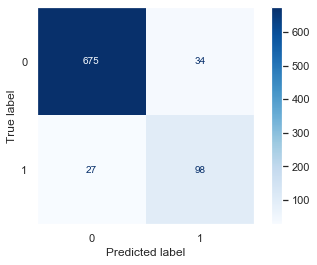

In [50]:
plot_confusion_matrix(rcf_grid, X_test, y_test, cmap=plt.cm.Blues, values_format='.3g')
plt.grid(False) # confusion matrix on test data 

In [51]:
# calculating accuracy score for test data  > (TP + TN ) / (TP + TN +  FP + FN)
Accuracy_Score =(101 + 680)/ (680 + 101 + 24 + 29)
Accuracy_Score

0.9364508393285371

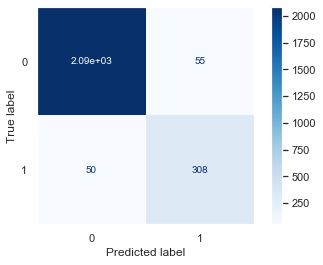

In [52]:
plot_confusion_matrix(rcf_grid, X_train, y_train, cmap=plt.cm.Blues, values_format='.3g')
plt.grid(False) # plotting confusion matrix on train data 

**Observation:** *As you can see the score has improved from the .85 we calculated in our modeless accuarcy score. But to be on the safe side (of not over fitting) we will try a much simpler model (DecisionTree) as well as confirm multicollinearity amongst the columns by plotting a pair plot.* 

In [53]:
dt_maxdepth2 = DecisionTreeClassifier(max_depth=2, criterion= 'entropy')
dt_maxdepth2.fit(X_train, y_train)
# Decision Tree model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
# helper function from Bryan Arnold DS 02172020 Intructor to plot a Decision Tree
'''Given the Decision Tree, and the columns/ X this function will print out the logic 
on of our Decision Tree and how it split up the data it was provided'''
def plot_tree(dt, used_cols, out_file='mytree.dot'):
    export_graphviz(dt, out_file=out_file, 
                    filled=True, feature_names=used_cols, 
                    leaves_parallel=True, node_ids=True)
    with open(out_file) as f:
        dot_graph = f.read()
    return graphviz.Source(dot_graph)

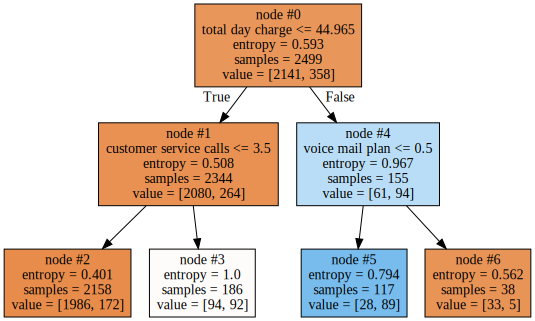

In [55]:
plot_tree(dt_maxdepth2, X.columns) # calling the helper function

In [56]:
X.columns # rechecking column names to make a new data frame to use for a pair plot
# this pair plot will tell us if using another simple model like linear regression would be worth the time 

Index(['account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'p_number'],
      dtype='object')

In [65]:
df2 = df.drop(columns= ['state', 'phone number', 'churn']) # creating new data frame
df2.head()

,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,p_number,target
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,4153824657,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,4153717191,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,4153581921,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,4083759999,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,4153306626,0


In [61]:
# sns.pairplot(df2) 
# plotting the pair plot using the new data frame
# commented out because it takes too long to plot and too much space

## Final Thoughts
Looking at the pair plot it is clear a leaner regression model won't work well because of several columns interaction with one another. The Decision Tree also did a poor job at splitting the data properly, we assume this has something to do with the fact that our data is so imbalanced. So as stated in the conclusion we will continue our model search by using gradient boost. 

In [66]:
df2.to_csv('Cleaned_Churn_Data.csv') # creating a new df with the cleaned data 